In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
dataset = pd.read_csv("UberDataSet.csv")

In [9]:
dataset.shape

(1156, 7)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [30]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [32]:
dataset['PURPOSE'].fillna("NOT", inplace = True)

In [16]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce') 

In [18]:
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce') 

In [20]:
from datetime import datetime
dataset['DATE'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['TIME']=pd.DatetimeIndex(dataset['START_DATE']).hour

In [22]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [34]:
dataset['Day-Night'] = pd.cut(x=dataset['TIME'], bins = [0, 10, 15, 19, 24], labels = ['Morning', 'AFTERNOON', 'Evening', 'Night'])

In [36]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON


In [38]:
dataset.dropna(inplace = True)

In [42]:
 dataset.shape

(413, 10)

# Data Visualization

<Axes: xlabel='count', ylabel='PURPOSE'>

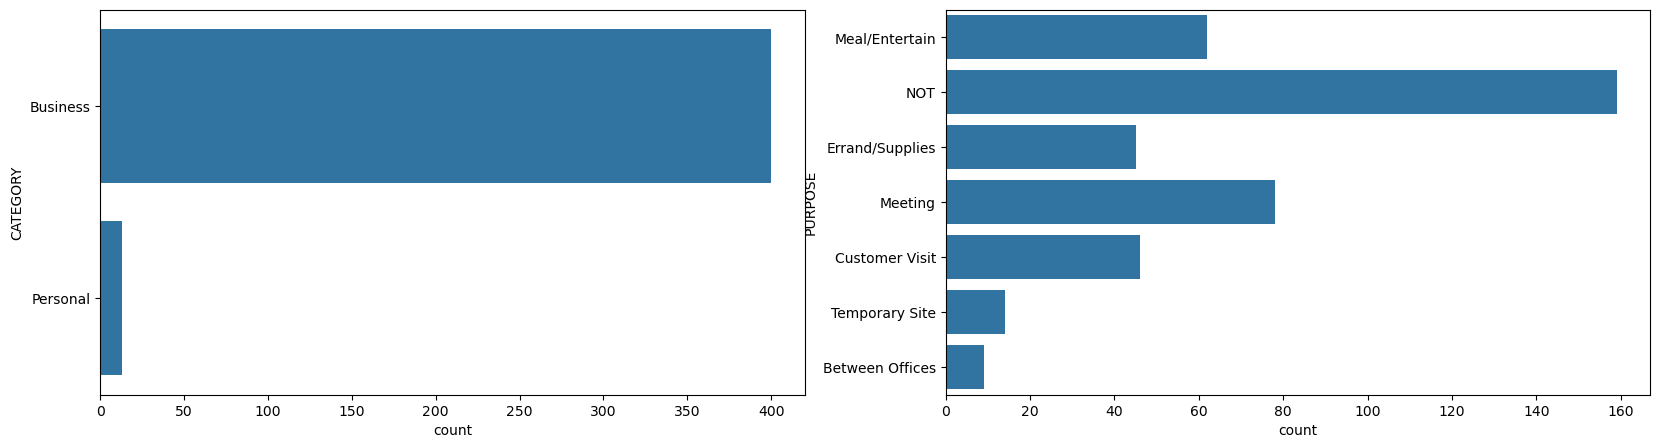

In [65]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.countplot(y=dataset['CATEGORY'])

plt.subplot(1,2,2)
sns.countplot(y=dataset['PURPOSE'])

<Axes: xlabel='count', ylabel='Day-Night'>

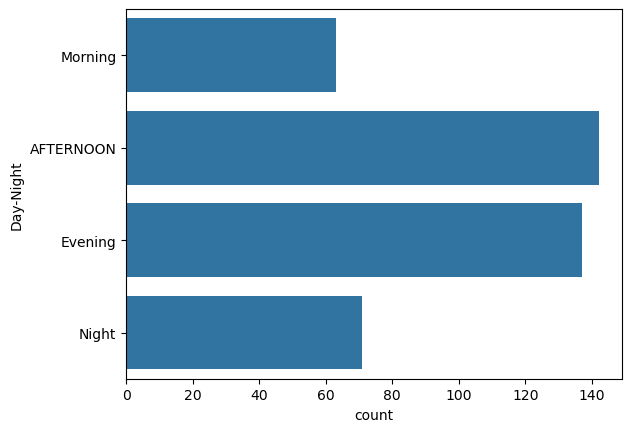

In [67]:
sns.countplot(dataset['Day-Night'])

In [101]:
dataset['MONTH']= dataset['START_DATE'].dt.month
month_label = {1.0 : 'JAN', 2.0: 'FEB',3.0: 'MARCH',4.0 : 'APRIL', 5.0 : 'MAY', 6.0: 'JUNE', 7.0: 'JULY',8.0:'AUGUST', 9.0:'SEP',
910.0 : 'OCT', 11.0: 'NOV', 12.0: 'DEC'} 
dataset['MONTH'] = dataset.MONTH.map(month_label)
mon = dataset.MONTH.value_counts(sort= False)

In [89]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Day-Night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,JAN
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,JAN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,JAN
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,JAN
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON,JAN


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE_COUNTS')]

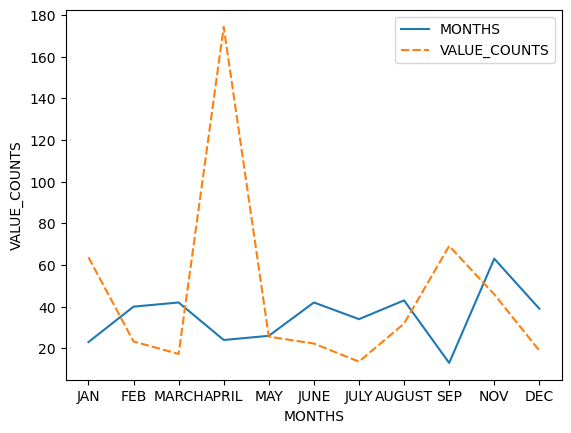

In [103]:
df = pd.DataFrame({
    "MONTHS" : mon.values,
    "VALUE_COUNTS" : dataset.groupby('MONTH', sort = False)['MILES']. max()})
p = sns.lineplot(data = df)
p.set(xlabel = "MONTHS", ylabel = "VALUE_COUNTS")

In [105]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = { 0: 'MON', 1: 'TUE', 2: 'WED', 3:'THUR', 4:'FRI', 5: 'SAT', 6:'SUN'}
dataset['DAY'] = dataset['DAY'].map(day_label)

In [107]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,Day-Night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,JAN,FRI
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,JAN,SAT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,JAN,SAT
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,JAN,TUE
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AFTERNOON,JAN,WED


Text(0, 0.5, 'COUNT')

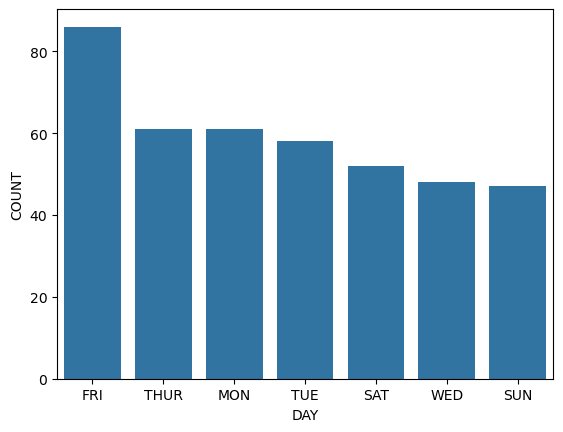

In [109]:
day_label = dataset.DAY.value_counts()
sns.barplot(x= day_label.index, y= day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

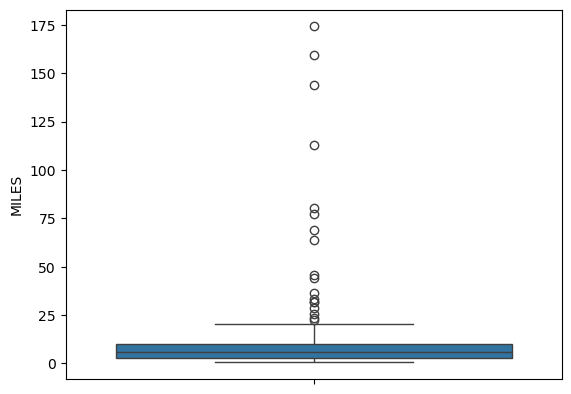

In [113]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

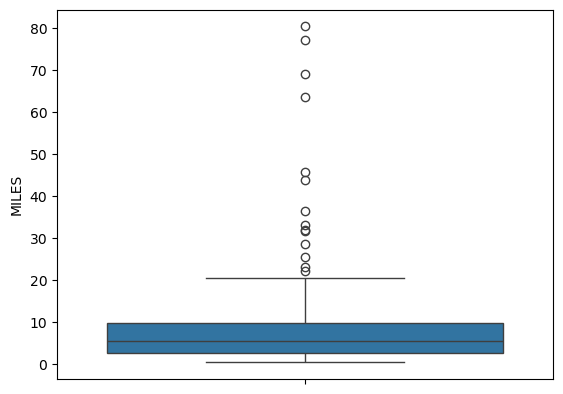

In [119]:
sns.boxplot(dataset[dataset['MILES'] < 100]['MILES'])

C:\Users\Rishika sharma\AppData\Local\Temp\ipykernel_10576\2618689913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40] ['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

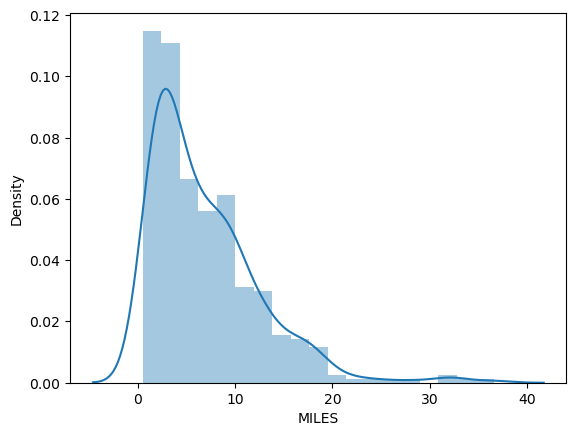

In [123]:
sns.distplot(dataset[dataset['MILES']<40] ['MILES'])